In [2]:
# execute this cell before continuing
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from __future__ import division
%matplotlib inline
#sns.set_style('whitegrid')

# Coding the Solow model

Assume we have an economy where:

* The production function is Cobb-Douglas:

$$ Y_t = F_t(K_t,A_t,L_t) = K_t^\alpha (A_tL_t)^{(1-\alpha)} $$

* Capital accumulation is given by:

$$\dot{K_t}=sY_t - \delta K_t $$

   (yes, it is continous time but you are welcome to code it in discrete if that's your jam)

* Labour grows at rate $n$, technology grows at rate $g$. The usual.

## 1. Plotting the Solow model diagram

For this you'll need:

**1.1 Define a function that finds the steady-sate $k^{*}$, given parameters ($s$,$n$,$g$,$\delta$,$\alpha$)**

*Do I have to calculate it by hand?* 

Yes! Most of the time computer only do the boring part, the juicy part is faster done by you - like deriving the steady-state value.

In [3]:
def k_star(params):
    '''Input: 
       params: dictionary with params. Must contain values: s,alpha,n,g,delta
       
       Output:
       k_star, float number'''
    
    k_star = (params['s']/(params['delta']+params['g']+params['n']))**(1.0/(1-params['alpha']))
    return k_star

**1.2 Define a vector of $k$ values. **

It can be from 0 to 5 in increments of 0.01 to start with. You can always change it later.

In [29]:
k_vec = np.arange(0,5,0.01)

**1.3 Define two functions: $sf(k)$ and $(n+g+\delta)k$**

Why? For plotting of course! Remember to add $k$ as an input.

In [6]:
def investment_line(ks,params):
    '''Inputs:
       ks: vector of k values
       params: dictionary with parameter values. Must contain at least alpha and s
       
       Output:
       A vector of the same length as ks with the value of sf(k)
       
       '''
    inv_vec = params['s']*(ks)**params['alpha']
    
    return inv_vec

def depreciation_line(ks, params):
    '''Inputs:
       ks: vector of k values
       params: dictionary with parameter values. Must contain at least alpha and s
       
       Output:
       A vector of the same length as ks with the value of sf(k)
       
       '''
    dep_vec = (params['delta']+params['g']+params['n'])*ks
    
    return dep_vec

**1.4 Define your parameters**

These will depend on how you defined your functions: Are the inputs numbers? You went fancy and use a dictionary?

Define your parameter values accordingly. And yeap, you can give it any value you like (subject to, you know, $\alpha<1$ etc)

In [7]:
my_pams = {'alpha':0.33, 'delta':0.05, 'n':0.02, 'g': 0.07, 's':0.2}

** 1.5 Plot the result! **

Use the functions you defined, the vector of ks and the parameters to plot:

* A line $sf(k)$
* A line $(n+g+\delta)k$
* A dot on the intersection (use `plt.scatter(x,y)`)

In [53]:
depreciation_line(k_ss,my_pams)

0.23841028718509916

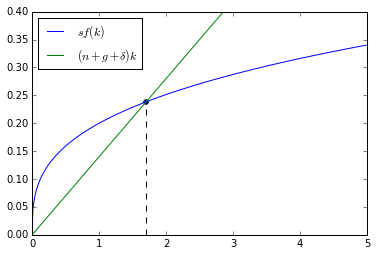

In [56]:
k_ss = k_star(my_pams)
ypoint = depreciation_line(k_ss,my_pams)
plt.plot(k_vec,investment_line(k_vec,my_pams),label='$sf(k)$')
plt.plot(k_vec,depreciation_line(k_vec,my_pams),label="$(n+g+\delta)k$")
plt.scatter(k_ss,depreciation_line(k_ss,my_pams))
plt.ylim(0,0.4)
plt.xlim(0,5)
plt.plot((k_ss,k_ss), (0,ypoint),ls='--',c='black')
plt.plot((k_ss,k_ss), (0,ypoint),ls='--',c='black')
plt.legend(loc='best')
plt.show()

Try to change the parameters in cell 1.4 and re-execute 1.5 to see what happens!

Extra points given if:

* You labelled the axis
* You added a dashs lines marking the steady-state

> **Extra work:** can you make a plot showing what happens if $n$ increases (like in the first tutorial)? 

When coding on your own, it is always a good practice to:

1. Make a list of things you need (a function, another set of parameters, a plot line etc)
2. Plan how to do that in a piece of paper (pseudo code)
3. Code it!
---------------------------

## 2. Ploting a shock to $L_t$

Suppose the economy starts at $t=0$ in steady state, but at $t=10$, $L_t$ doubles overnight. All parameters remain unchanged.

Show a plot with the evolution of $k$ from $t=0$ to $t=100$. Has the economy gotten back to the steady state by t=100?

For this you'll need:

** 2.1 Define a function for $k_{t+1}(k_t)$**

In [5]:
# Define k_t+1 as a function of parameters and the current value of k_t

**2.2 Create vector with the value of $k_t$ at all 100 points**

Remember: the first 10 should be all equal to $k^*$

In [6]:
# Create a k vector with 9 values equal to k*, then the 10th one the one just after the inlux of Lt

In [7]:
# Use your k_t+1 function to add the remaining values to your k vector

**2.3 Plot your vector of $k$s (Impulse response function)**

In [ ]:
# Plot your k vector (Y axis) against a vector with numbers 0 to 100 (X axis)

> **Extra work:** Plot the impulse response function for output per effective worker too. Try to make subplots for each.

> **Extra work (hard mode):** Can you plot the evolution of output and capital **per worker**?

------------------

## 3. Encapsulating a plot inside a function

To keep the code clean, it is good practice to group a series of routines inside a function. Plotting easily lends itself to this - in python, not so much in matlab. But in matlab is common practice to encapsulate bits of code into functions too, so this exercise is useful anyway.

With the code from exercise 1, define a function that:

* Takes as inputs (1) a list or dictionary of old parameters, (2) the name of the parameter to shock and (3) the shock size.
* Gives as output a Solow model plot with the change.

I have written pseudo code to guide you. If you feel brave, erase it and do it from scratch yourself!

Tip: Copy pasting is your friend here.

Tip: It is preferable to use a dictionary better than a list. Can you guess why?

In [ ]:
# define function "Solow_shock" of old_parameters, parameter_to_shock, shock_size
#    Create a range of ks
#    Create space for the plot (optional)
#    plot the investment line with old parameters           (a)
#    plot the depreciation+n+g line with old parameters     (b)
#        if any of the parameters for (a) have changed:
#               plot the new investment line (dashed)
#        elif any of the parameters of b has changed:
#               plot the new depreciation line (dashed)
#    plot the old steady state
#    plot the new steady state
#    show the plot

Careful with the indentation!

> **Extra work:** Add vertical and horizontal lines to mark the new steady-state (`plt.axhline`, `plt.axvline`)

> **Extra work:** Make the shock to be optional by giving (2) and (3) default values. For example:
> ```python
> def function_name(input1,input2=None):
> ```
                   
> Will make input 2 to have the value `None` by default. `None` is a diferent type of object (not a boolean or string or number). Useful for conditionals!

Practice your function below:

In [ ]:
# Practice cell

---------------

If you made it through this exercise, you should have learned:  

<form action="demo_form.asp" method="get">
  <p>&nbsp;</p>
  <input type="checkbox" name="vehicle" value="Bike"> How to add values to a vector using a defined function<br>
  <input type="checkbox" name="vehicle" value="Car" > How to encapsulate a plot into a function<br>
  <input type="checkbox" name="vehicle" value="Car" > How to plot IRFs<br>
</form>

Feel free to change or add content to this notebook.

***Next time: Neoclassical Model!***